In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [ ]:
df = pd.read_csv("/content/Untitled spreadsheet - Online Retail.csv")

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Check the shape and first few rows of the dataset
print("Shape of the dataset:\n", df.shape)
df.head()


Shape of the dataset:
 (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Missing values
print("Missing values:")
df.isnull().sum()

Missing values:


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Drop rows with missing CustomerID values as they are important  for clustering
df = df.dropna(subset=['CustomerID'])

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
import plotly.express as px

# Box plot for Quantity using Plotly
fig_quantity = px.box(df, y='Quantity', title='Quantity Boxplot')
fig_quantity.update_layout(template='plotly_dark')
fig_quantity.show()

# Box plot for UnitPrice using Plotly
fig_unitprice = px.box(df, y='UnitPrice', title='UnitPrice Boxplot')
fig_unitprice.update_layout(template='plotly_dark')
fig_unitprice.show()


In [ ]:
# Remove outliers using IQR method
# Exclude non-numeric columns from quantile calculation
numeric_cols = ['Quantity', 'UnitPrice']
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers using IQR method
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Quantity', 'UnitPrice']])

# Convert scaled_data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Quantity', 'UnitPrice'])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



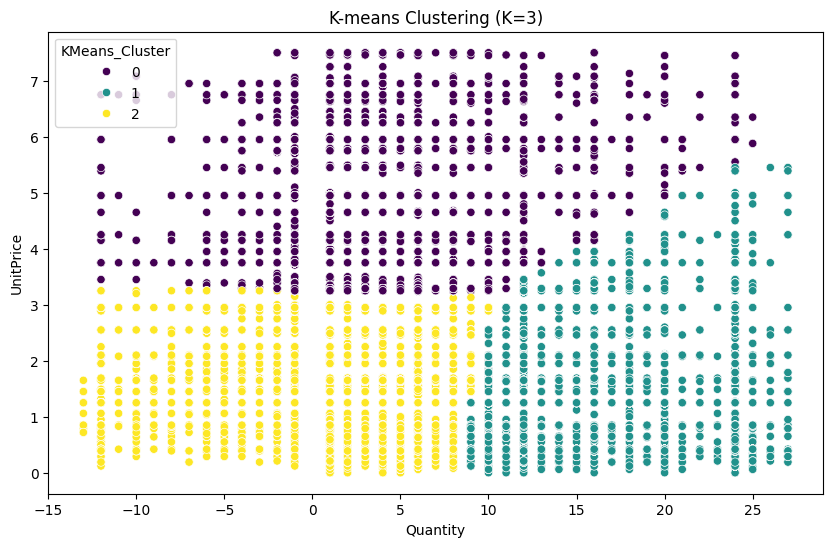

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



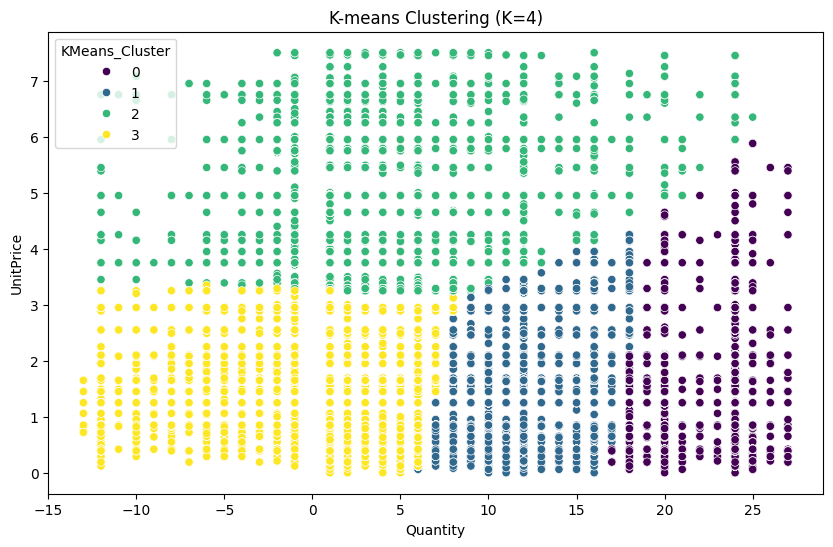

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



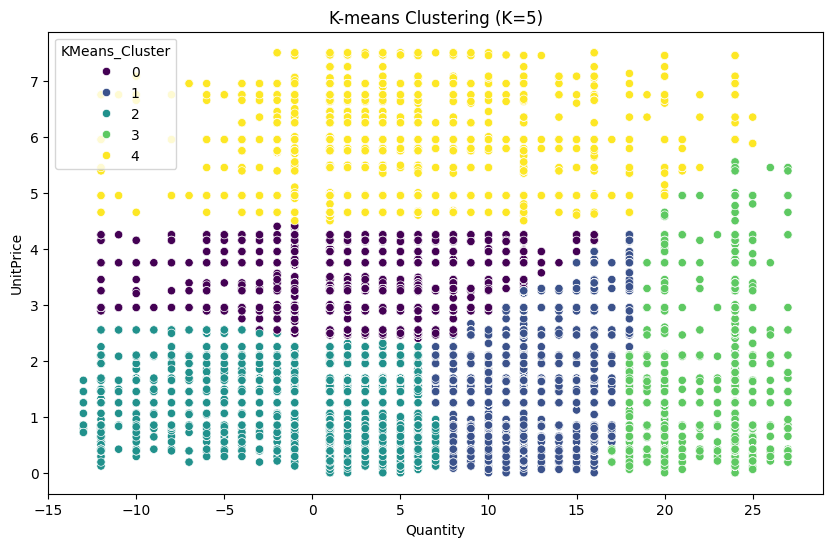

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Define functions for K-means clustering and visualization
def perform_kmeans(data, n_clusters, n_init=10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    return kmeans.labels_

def visualize_clusters(data, x_col, y_col, hue_col, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_col, y=y_col, hue=hue_col, palette='viridis')
    plt.title(title)
    plt.show()

# Perform K-means clustering with different numbers of clusters
k_values = [3, 4, 5]
for k in k_values:
    df['KMeans_Cluster'] = perform_kmeans(data=scaled_df, n_clusters=k, n_init=10)
    visualize_clusters(df, 'Quantity', 'UnitPrice', 'KMeans_Cluster', f'K-means Clustering (K={k})')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import zscore  # Importing zscore function




In [ ]:
from scipy.stats import zscore  # Importing zscore function

NOTE : The agglomerative clustering is not working due to memory constraints. The session is crashing, same is happening on jupyter notebook as well. The hierarchical clustering, creates a distance matrix with shape `(n, n)`, where `n` is the number of data points. This is quite memory-intensive for large datasets, causing a `MemoryError` as seen in the previous output. I've tried solving this problem but the system's memory capacity cannot handle

In [ ]:

missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

imputer = SimpleImputer(strategy='mean')
df['CustomerID'] = imputer.fit_transform(df[['CustomerID']])

df['Quantity_zscore'] = zscore(df['Quantity'])
df['UnitPrice_zscore'] = zscore(df['UnitPrice'])

zscore_threshold = 3
outliers_quantity = df[df['Quantity_zscore'].abs() > zscore_threshold]
outliers_unitprice = df[df['UnitPrice_zscore'].abs() > zscore_threshold]

df = df[(df['Quantity_zscore'].abs() <= zscore_threshold) & (df['UnitPrice_zscore'].abs() <= zscore_threshold)]

df.drop(['Quantity_zscore', 'UnitPrice_zscore'], axis=1, inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Quantity', 'UnitPrice']])

k_values = [2, 3, 4, 5]

plt.figure(figsize=(8, 6))
for i, k in enumerate(k_values):
    plt.subplot(2, 2, i+1)
    linkage_matrix = linkage(scaled_data, method='ward')
    dendrogram(linkage_matrix, truncate_mode='level', p=k)
    plt.title(f'Hierarchical Clustering with {k} clusters')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
plt.tight_layout()
plt.show()

Missing Values:
InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
KMeans_Cluster    0
dtype: int64
